In [1]:
# packages

# standard
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
#import plotly.express as px

# statistics
from statsmodels.graphics.mosaicplot import mosaic

# machine learning
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from joblib import dump

import os

In [2]:
for dirname, _, filenames in os.walk('/home/grazol/Desktop/dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/home/grazol/Desktop/dataset/README.md
/home/grazol/Desktop/dataset/2020/06/2020.06.19/2020.06.19.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.20/2020.06.20.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.21/2020.06.21.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.22/2020.06.22.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.23/2020.06.23.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.24/2020.06.24.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.25/2020.06.25.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.26/2020.06.26.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.27/2020.06.27.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.28/2020.06.28.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.29/2020.06.29.csv
/home/grazol/Desktop/dataset/2020/06/2020.06.30/2020.06.30.csv
/home/grazol/Desktop/dataset/2020/07/2020.07.01/2020.07.01.csv
/home/grazol/Desktop/dataset/2020/07/2020.07.02/2020.07.02.csv
/home/grazol/Desktop/dataset/2020/07/2020.07.03/2020.07.03.csv
/home/grazol/Des

For each day of the month there is a separate folder

In [3]:
# read the data
df1 = pd.read_csv('/home/grazol/Desktop/dataset/2022/06/2022.06.12/2022.06.12.csv')
df2 = pd.read_csv('/home/grazol/Desktop/dataset/2022/06/2022.06.13/2022.06.13.csv')
df3 = pd.read_csv('/home/grazol/Desktop/dataset/2022/06/2022.06.14/2022.06.14.csv')
df4 = pd.read_csv('/home/grazol/Desktop/dataset/2022/06/2022.06.12/2022.06.12.csv')
df5 = pd.read_csv('/home/grazol/Desktop/dataset/2021/02/2021.02.04/2021.02.04.csv')

In [4]:
df_example = pd.concat([df1, df2, df3, df4, df5])
df_example.reset_index(drop=True, inplace=True)
del(df1, df2, df3, df4, df5)
print(df_example)

            avg_ipt  bytes_in  bytes_out  dest_ip  dest_port   entropy   
0          0.000000         0          0      786    31306.0  0.000000  \
1          0.000000         0          0      786    24298.0  0.000000   
2          0.000000         0          0      786    31789.0  0.000000   
3          0.000000         0          0      786    29409.0  0.000000   
4          0.000000         0          0      786    60965.0  0.000000   
...             ...       ...        ...      ...        ...       ...   
1467018  576.076923      1982       7802      786     9200.0  4.288589   
1467019    0.000000         0          0      786     5901.0  0.000000   
1467020    4.000000       327       1149      786     9200.0  5.870455   
1467021  626.000000       654      17687      786     9200.0  1.948065   
1467022   54.000000         0         47      786    39997.0  4.155132   

         num_pkts_out  num_pkts_in  proto  src_ip  src_port          time_end   
0                   1         

# Explorations

In [5]:
# dimensions of data
df_example.shape

(1467023, 16)

In [6]:
# imputation of missings and conversion to int
df_example.dest_port = df_example.dest_port.fillna(-1).astype('int64')
df_example.src_port = df_example.src_port.fillna(-1).astype('int64')

In [7]:
# summary of numerical features
df_example.describe()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
count,1.467023e+06,1.467023e+06,1.467023e+06,1467023.0,1.467023e+06,1.467023e+06,1.467023e+06,1.467023e+06,1.467023e+06,1467023.0,1.467023e+06,1.467023e+06,1.467023e+06,1.467023e+06,1.467023e+06
mean,5.090109e+06,6.456864e+02,3.580376e+03,786.0,1.345183e+04,2.995657e+00,7.325755e+00,4.412594e+00,5.712503e+00,786.0,3.330741e+04,1.494225e+15,1.495381e+15,1.363795e+04,1.448166e+00
std,8.441782e+07,3.108715e+03,8.037268e+03,0.0,1.553675e+04,2.410761e+00,2.060849e+01,1.405244e+01,1.863385e+00,0.0,1.956436e+04,4.498122e+14,4.482709e+14,7.513925e+04,5.505341e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,786.0,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,786.0,-1.000000e+00,1.612415e+10,1.612411e+10,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,786.0,5.900000e+03,8.112780e-01,1.000000e+00,0.000000e+00,6.000000e+00,786.0,9.200000e+03,1.612416e+15,1.612416e+15,3.245112e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,5.600000e+01,786.0,9.200000e+03,3.000000e+00,3.000000e+00,1.000000e+00,6.000000e+00,786.0,3.890400e+04,1.655098e+15,1.655098e+15,9.695192e+02,1.560000e-04
75%,3.100000e+01,3.400000e+01,3.217000e+03,786.0,9.200000e+03,4.995143e+00,7.000000e+00,4.000000e+00,6.000000e+00,786.0,4.723200e+04,1.655177e+15,1.655177e+15,2.095639e+04,1.847915e-01
max,4.294967e+09,6.548300e+04,6.553500e+04,786.0,6.553500e+04,1.342394e+02,2.550000e+02,2.550000e+02,4.700000e+01,786.0,6.553500e+04,1.655251e+15,1.655251e+15,3.979174e+06,4.102360e+01


In [8]:
# init plot size
plt.rcParams['figure.figsize']=(7,4)

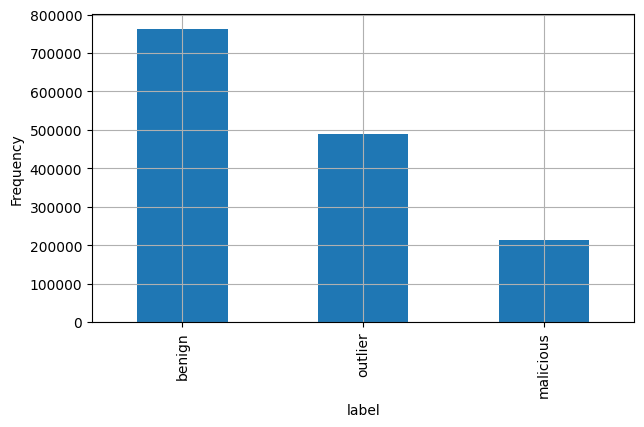

In [9]:
# label distribution
df_example.label.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.grid()
plt.show()

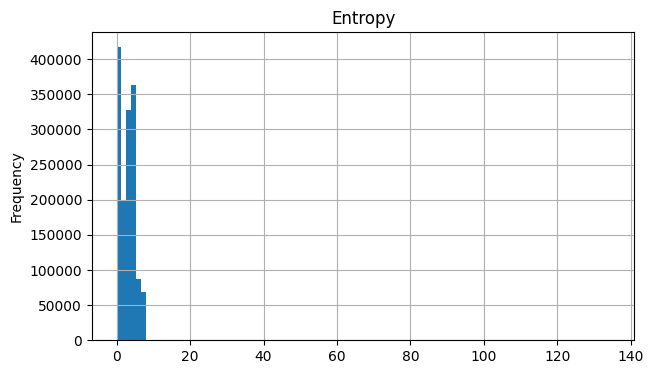

In [10]:
# entropy in bits per byte of the data fields within the flow; ranges from 0 to 8.
df_example.entropy.plot(kind='hist', bins=100)
plt.title('Entropy')
plt.grid()
plt.show()

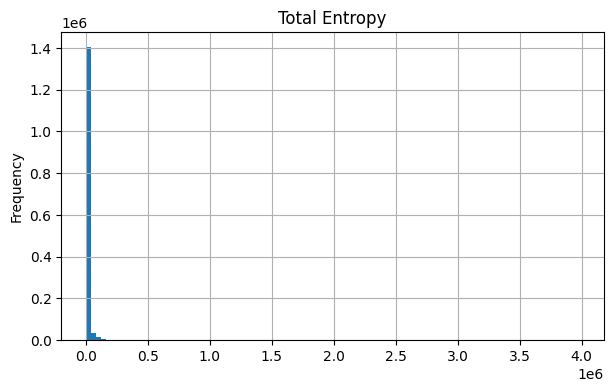

In [11]:
# total entropy in bytes over all of the bytes in the data fields of the flow
df_example.total_entropy.plot(kind='hist', bins=100)
plt.title('Total Entropy')
plt.grid()
plt.show()

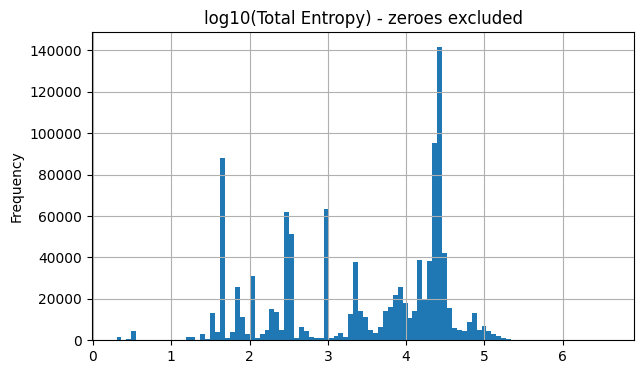

In [12]:
# look at non-zeroes only
total_entropy_pos = df_example.total_entropy[df_example.total_entropy>0]
# show log plot
plt.hist(np.log10(total_entropy_pos),100)
plt.ylabel('Frequency')
plt.title('log10(Total Entropy) - zeroes excluded')
plt.grid()
plt.show()

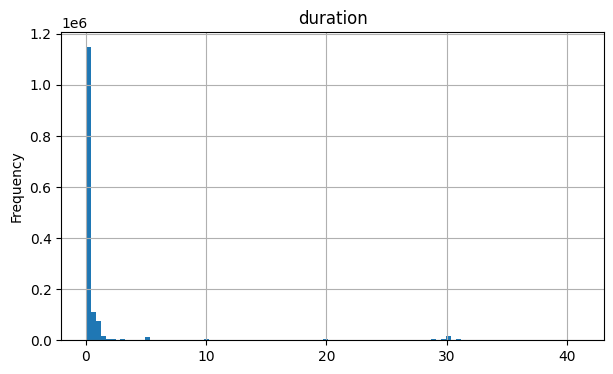

In [13]:
# flow duration time, with microsecond precision
df_example.duration.plot(kind='hist', bins=100)
plt.title('duration')
plt.grid()
plt.show()

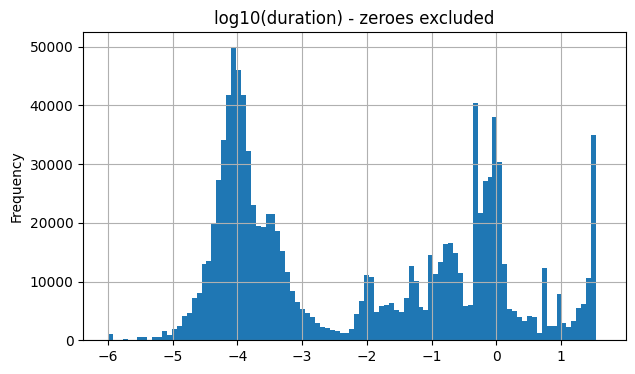

In [14]:
# look at non-zeroes only
duration_pos = df_example.duration[df_example.duration>0]
# show log plot
plt.hist(np.log10(duration_pos),100)
plt.ylabel('Frequency')
plt.title('log10(duration) - zeroes excluded')
plt.grid()
plt.show()

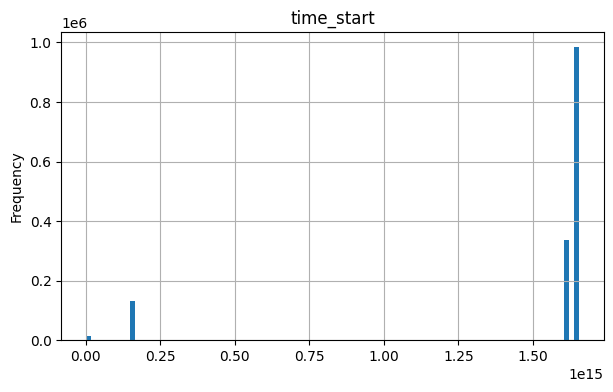

In [15]:
# start time of the flow in seconds since the epoch
df_example.time_start.plot(kind='hist', bins=100)
plt.title('time_start')
plt.grid()
plt.show()

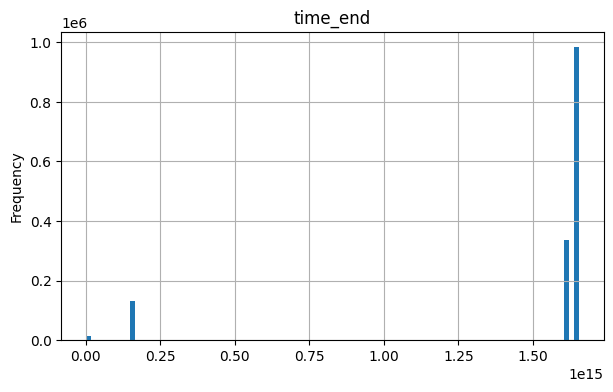

In [16]:
# end time of the flow in seconds since the epoch
df_example.time_end.plot(kind='hist', bins=100)
plt.title('time_end')
plt.grid()
plt.show()

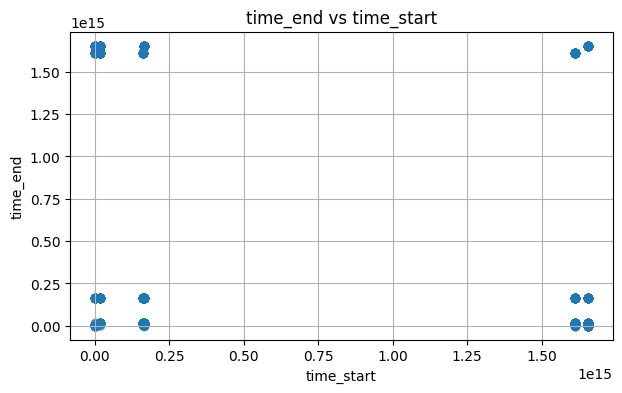

In [17]:
# 2D plot of start and end time
plt.scatter(df_example.time_start, df_example.time_end, alpha=0.1)
plt.xlabel('time_start')
plt.ylabel('time_end')
plt.title('time_end vs time_start')
plt.grid()
plt.show()

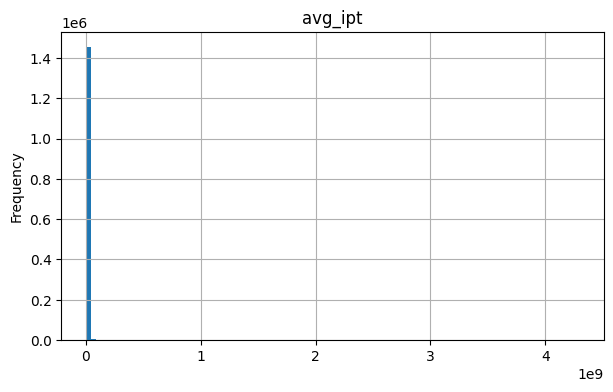

In [18]:
# mean of the inter-packet arrival times of the flow (in description called "mean_ipt")
df_example.avg_ipt.plot(kind='hist', bins=100)
plt.title('avg_ipt')
plt.grid()
plt.show()

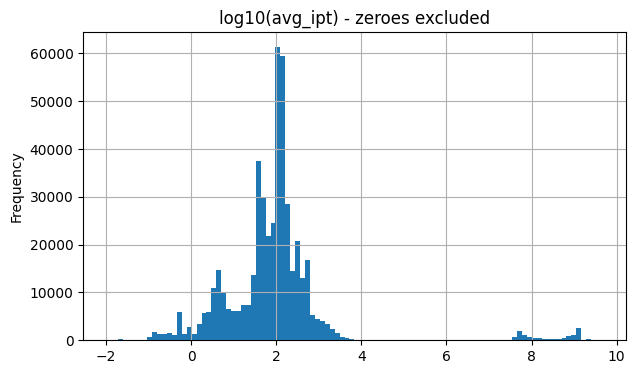

In [19]:
# look at non-zeroes only
avg_ipt_pos = df_example.avg_ipt[df_example.avg_ipt>0]
# show log plot
plt.hist(np.log10(avg_ipt_pos),100)
plt.ylabel('Frequency')
plt.title('log10(avg_ipt) - zeroes excluded')
plt.grid()
plt.show()

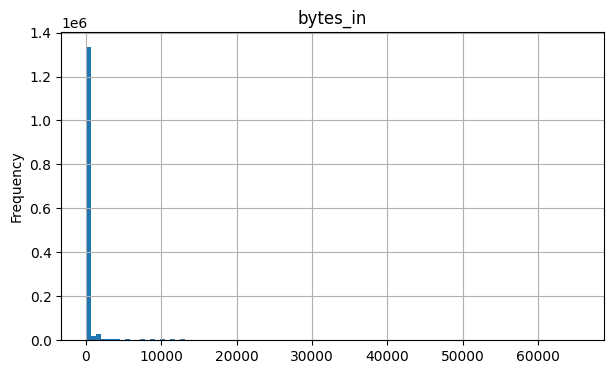

In [20]:
# number of bytes transmitted from source to destination
df_example.bytes_in.plot(kind='hist', bins=100)
plt.title('bytes_in')
plt.grid()
plt.show()

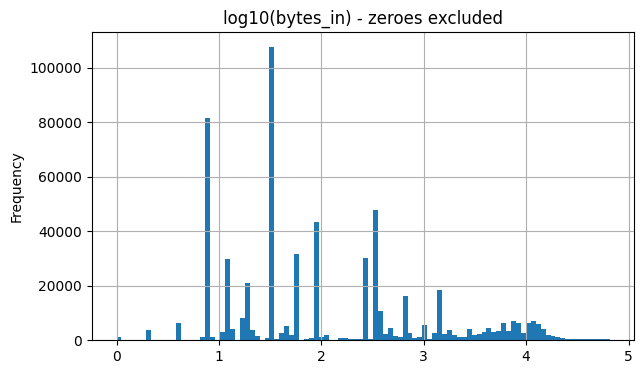

In [21]:
# look at non-zeroes only
bytes_in_pos = df_example.bytes_in[df_example.bytes_in>0]
# show log plot
plt.hist(np.log10(bytes_in_pos),100)
plt.ylabel('Frequency')
plt.title('log10(bytes_in) - zeroes excluded')
plt.grid()
plt.show()

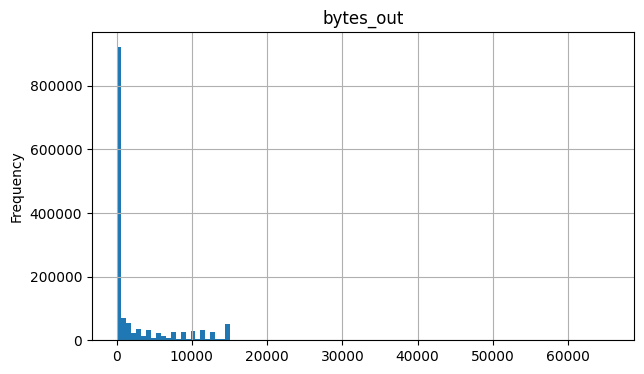

In [22]:
# number of bytes transmitted from destination to source.
df_example.bytes_out.plot(kind='hist', bins=100)
plt.title('bytes_out')
plt.grid()
plt.show()

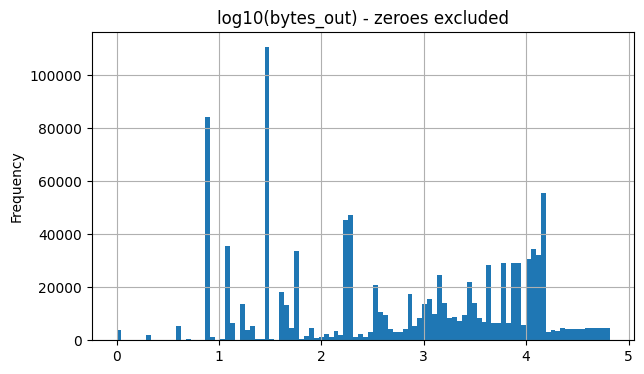

In [23]:
# look at non-zeroes only
bytes_out_pos = df_example.bytes_out[df_example.bytes_out>0]
# show log plot
plt.hist(np.log10(bytes_out_pos),100)
plt.ylabel('Frequency')
plt.title('log10(bytes_out) - zeroes excluded')
plt.grid()
plt.show()

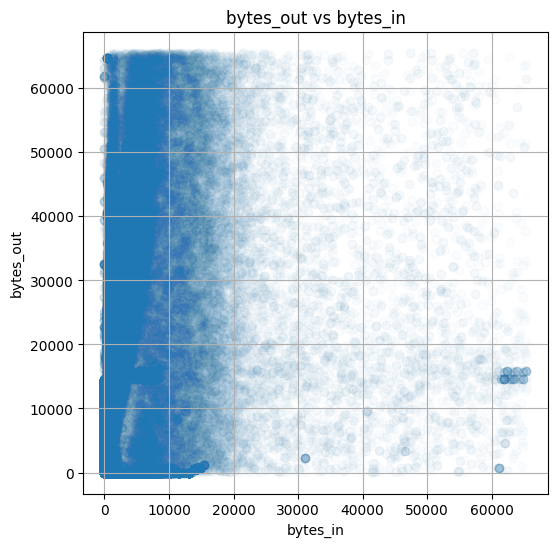

In [24]:
# 2D plot of bytes in / out
plt.figure(figsize=(6,6))
plt.scatter(df_example.bytes_in, df_example.bytes_out, alpha=0.02)
plt.xlabel('bytes_in')
plt.ylabel('bytes_out')
plt.title('bytes_out vs bytes_in')
plt.grid()
plt.show()

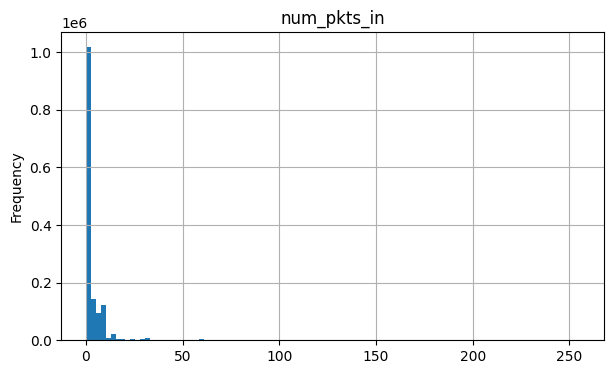

In [25]:
# packet count from source to destination
df_example.num_pkts_in.plot(kind='hist', bins=100)
plt.title('num_pkts_in')
plt.grid()
plt.show()

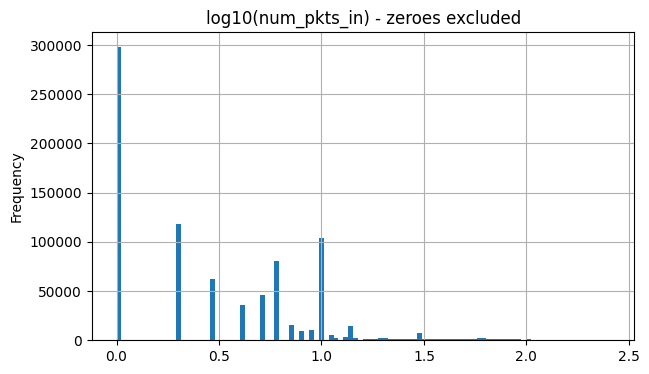

In [26]:
# look at non-zeroes only
num_pkts_in_pos = df_example.num_pkts_in[df_example.num_pkts_in>0]
# show log plot
plt.hist(np.log10(num_pkts_in_pos),100)
plt.ylabel('Frequency')
plt.title('log10(num_pkts_in) - zeroes excluded')
plt.grid()
plt.show()

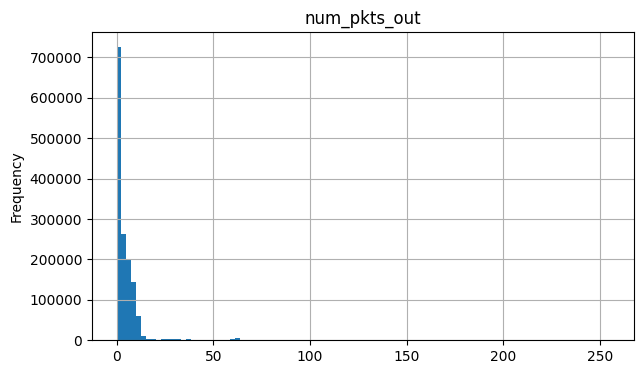

In [27]:
# packet count from destination to source
df_example.num_pkts_out.plot(kind='hist', bins=100)
plt.title('num_pkts_out')
plt.grid()
plt.show()

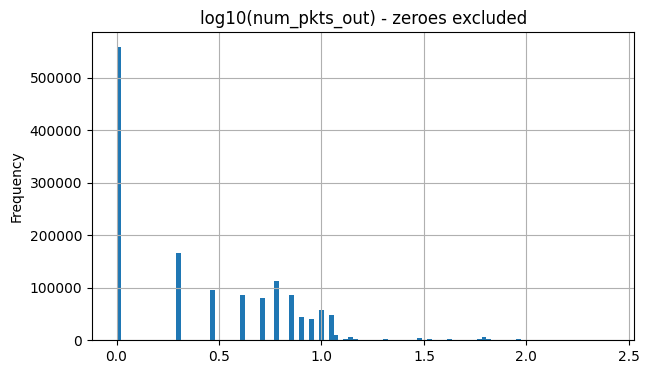

In [28]:
# look at non-zeroes only
num_pkts_out_pos = df_example.num_pkts_out[df_example.num_pkts_out>0]
# show log plot
plt.hist(np.log10(num_pkts_out_pos),100)
plt.ylabel('Frequency')
plt.title('log10(num_pkts_out) - zeroes excluded')
plt.grid()
plt.show()

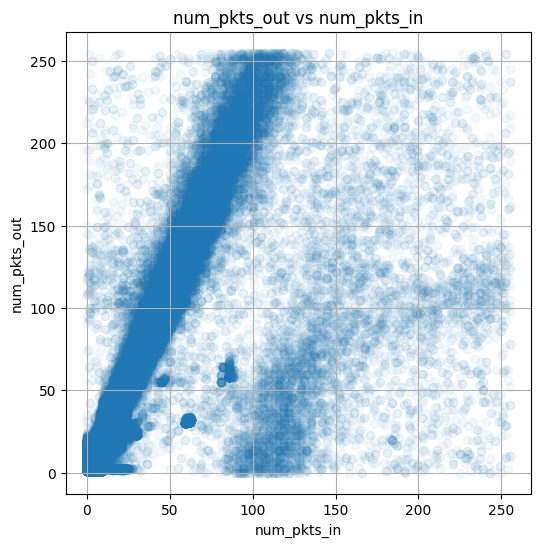

In [29]:
# 2D plot of packets in / out
plt.figure(figsize=(6,6))
plt.scatter(df_example.num_pkts_in, df_example.num_pkts_out, alpha=0.05)
plt.xlabel('num_pkts_in')
plt.ylabel('num_pkts_out')
plt.title('num_pkts_out vs num_pkts_in')
plt.grid()
plt.show()

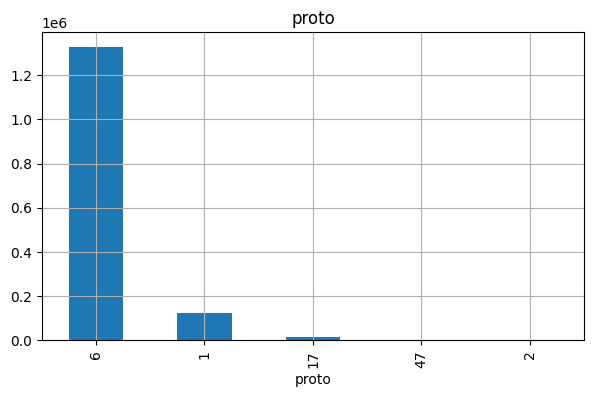

In [30]:
# protocol number associated with the flow; e. g. TCP is 6
df_example.proto.value_counts().plot(kind='bar')
plt.title('proto')
plt.grid()
plt.show()

In [31]:
# check impact of protocol on target
pd.crosstab(df_example.proto, df_example.label)

label,benign,malicious,outlier
proto,,,
1,0,45354,75719
2,2,0,0
6,759806,162534,407290
17,3444,5630,7107
47,0,5,132


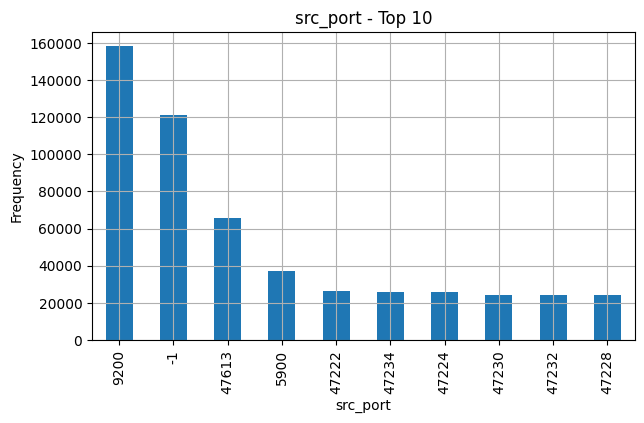

In [32]:
# source port plot
df_example.src_port.value_counts().iloc[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('src_port - Top 10')
plt.grid()
plt.show()

In [33]:
# destination port
df_example.dest_port.value_counts()

dest_port
 9200     565254
 5900     195439
-1        121212
 445       87838
 22        39332
           ...  
 23215         1
 922           1
 31161         1
 29768         1
 31819         1
Name: count, Length: 60243, dtype: int64

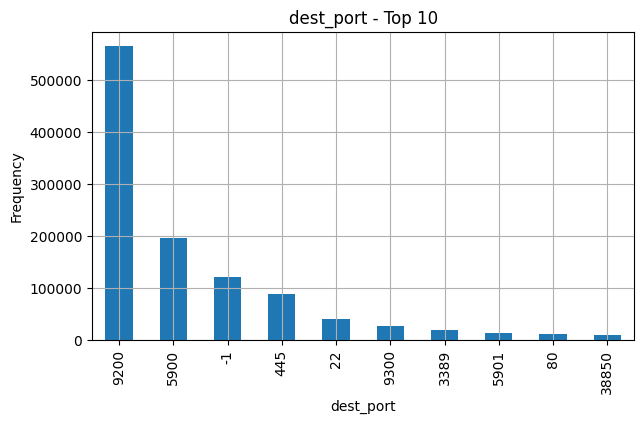

In [34]:
# destination port plot
df_example.dest_port.value_counts().iloc[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('dest_port - Top 10')
plt.grid()
plt.show()

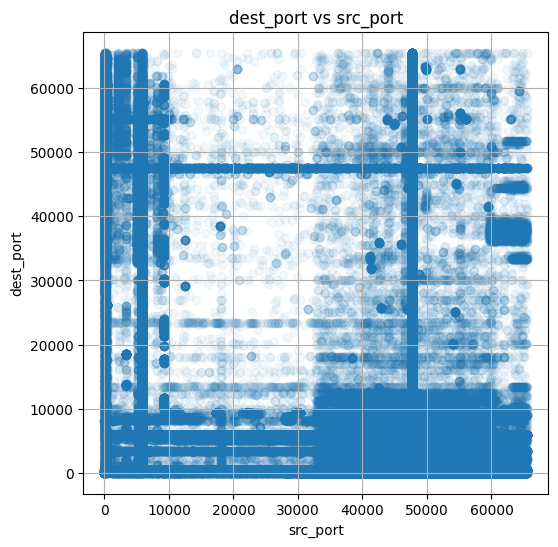

In [35]:
# destination port vs source port
plt.figure(figsize=(6,6))
plt.scatter(df_example.src_port, df_example.dest_port, alpha=0.05)
plt.xlabel('src_port')
plt.ylabel('dest_port')
plt.title('dest_port vs src_port')
plt.grid()
plt.show()

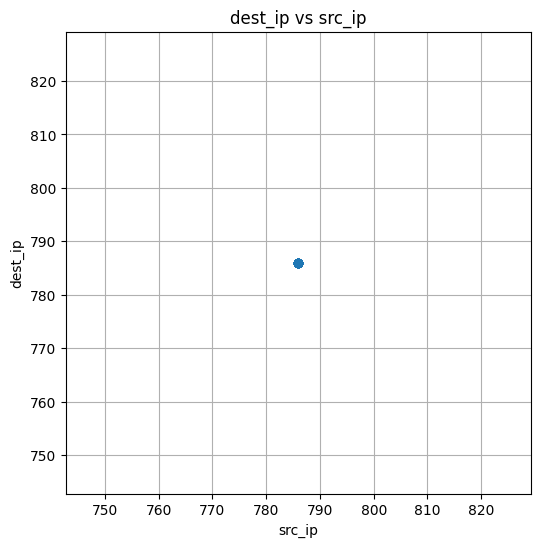

In [36]:
# destination IP vs source IP
plt.figure(figsize=(6,6))
plt.scatter(df_example.src_ip, df_example.dest_ip, alpha=0.1)
plt.xlabel('src_ip')
plt.ylabel('dest_ip')
plt.title('dest_ip vs src_ip')
plt.grid()
plt.show()

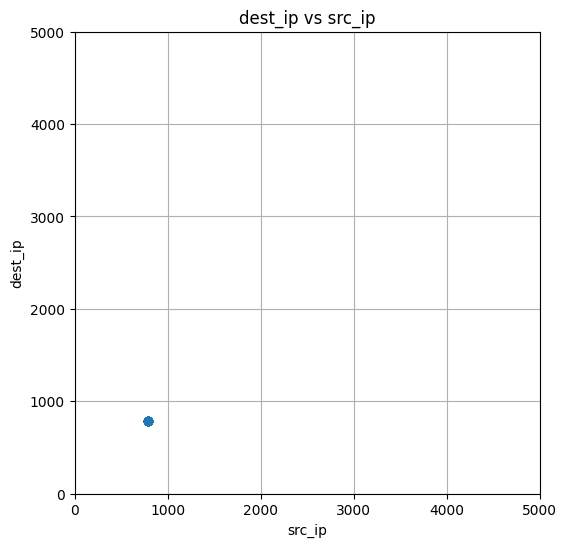

In [37]:
# zoom in
plt.figure(figsize=(6,6))
plt.scatter(df_example.src_ip, df_example.dest_ip, alpha=0.1)
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.xlabel('src_ip')
plt.ylabel('dest_ip')
plt.title('dest_ip vs src_ip')
plt.grid()
plt.show()

In [38]:
# dropping src_ip ve dest_ip
df_example.drop(['src_ip', 'dest_ip'], axis=1, inplace=True)

# Creating X, y variables

In [39]:
train, test = train_test_split(df_example, test_size=0.2)
del(df_example)

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173618 entries, 1446329 to 396178
Data columns (total 14 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   avg_ipt        1173618 non-null  float64
 1   bytes_in       1173618 non-null  int64  
 2   bytes_out      1173618 non-null  int64  
 3   dest_port      1173618 non-null  int64  
 4   entropy        1173618 non-null  float64
 5   num_pkts_out   1173618 non-null  int64  
 6   num_pkts_in    1173618 non-null  int64  
 7   proto          1173618 non-null  int64  
 8   src_port       1173618 non-null  int64  
 9   time_end       1173618 non-null  int64  
 10  time_start     1173618 non-null  int64  
 11  total_entropy  1173618 non-null  float64
 12  label          1173618 non-null  object 
 13  duration       1173618 non-null  float64
dtypes: float64(4), int64(9), object(1)
memory usage: 134.3+ MB


In [41]:
y_train = np.array(train.pop("label"))# pop removes "Label" from the dataframe
X_train = train.values
y_test = np.array(test.pop("label")) # pop removes "Label" from the dataframe
X_test = test.values

# Fit a predictive model

In [42]:
rf = RandomForestClassifier(n_estimators=60)

parameters = {'n_estimators': [50, 100, 150], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', None]}

random_search = RandomizedSearchCV(rf, param_distributions=parameters, n_iter=10, cv=3, n_jobs=-1)
random_search.fit(X_train , y_train)
best_accuracy = random_search.best_score_
best_parameters = random_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.57 %
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': None}


In [43]:
best_rf = RandomForestClassifier(**random_search.best_params_)
best_rf.fit(X_train, y_train)

# Predicting Train & Test Results
y_rf = best_rf.predict(X_train)
y_pred_rf = best_rf.predict(X_test)

# Accuracy
print("Accuracy on Training set: ",metrics.accuracy_score(y_train, y_rf))
print("Accuracy on Testing set: ",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy on Training set:  0.9924183166924843
Accuracy on Testing set:  0.9770590139909


# > Modeli Kaydet

In [44]:
filename = 'random_forest.joblib'
dump(best_rf, filename)

['random_forest.joblib']